# Load

In [50]:
from paintings import PaintingEnv
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
env = PaintingEnv()

# Details

Information on our data

In [3]:
# number of actions
action_size = env.action_space.n
print('Number of actions:', action_size)

# examine the state space
state_size = env.observation_space.shape[0]
print('States composed of', state_size, 'paintings')

Number of actions: 2
States composed of 2 paintings


In [80]:
# We select 3 out of 5 artists randonly
# For each artist we have 6 paintings so 18 paintings total
len(env.paintings)

18

In [82]:
# There are a total of 90 trials in one episode
# There is no transition matrix as this is a bandit task and so each trial is independent of the next one
len(env.painting_pairs)

90

In [84]:
# Each trial consists of two paintings that can be of the same artist or from a different artist
# All possible pairs of paintings of the same artist are shown, and some of the pairs of paintings between artists are shown
env.painting_pairs[0]

('Deka1n', 'Mona1n')

## Reward Values

In [46]:
# Artists and the average value for each artist
env.artist_to_val

{'Mon': 0.2, 'Dek': 0.4, 'Roh': 0.6}

In [47]:
# We can get the value of each painting
reward_values = [ x['display_value']/100.0 for _,x in env.paintings.items() ]
pd.Series(reward_values).value_counts()

0.2    6
0.4    6
0.8    3
0.6    2
0.0    1
dtype: int64

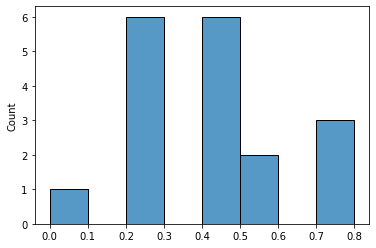

In [48]:
sns.histplot(reward_values, binwidth=0.1)

In [71]:
# Get the rewards by artists
reward_by_artist = defaultdict(lambda: [])
for _,x in env.paintings.items():
    reward_by_artist[x['style']].append(x['display_value']/100.0)
# Sort each value
reward_by_artist = { k : sorted(v) for k,v in reward_by_artist.items() }
# Show
reward_by_artist

{'Dek': [0.2, 0.2, 0.2, 0.4, 0.4, 0.6],
 'Mon': [0.0, 0.2, 0.2, 0.2, 0.4, 0.4],
 'Roh': [0.4, 0.4, 0.6, 0.8, 0.8, 0.8]}

In [72]:
# Theoretical Averages
{ k : v for k,v in sorted(env.artist_to_val.items()) }

{'Dek': 0.4, 'Mon': 0.2, 'Roh': 0.6}

In [73]:
# Actual Averages
{ k : np.mean(v).round(2) for k,v in reward_by_artist.items() }

{'Dek': 0.33, 'Mon': 0.23, 'Roh': 0.63}

It seems like the reward value for each painting within an artist isn't uniformly distributed.

# Test out

In [4]:
state, reward, done, info = env.reset()

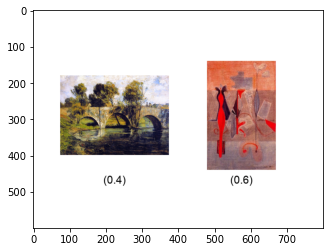

In [5]:
env.render(show_as="matplotlib")

In [6]:
state[0].shape # Left Image

(300, 300, 3)

In [7]:
state[1].shape # Right Image

(300, 300, 3)

In [8]:
info['left'] # Reward is display_value/100

{'name': 'Rohla1',
 'type': 'concrete',
 'train': True,
 'style': 'Roh',
 'phase': 1,
 'value': 0.2,
 'path': './stimuli/Rohla1.jpeg',
 'display_value': 40}

In [9]:
info['right'] # Reward is display_value/100

{'name': 'Rothb2',
 'type': 'intermediate',
 'train': True,
 'style': 'Rot',
 'phase': 1,
 'value': 0,
 'path': './stimuli/Rothb2.jpeg',
 'display_value': 60}

In [10]:
info['trial_type']

'different artist'

# Random Agent

In [13]:
scores = [0]                                          # initialize the score
state, reward, done, info = env.reset()
while True:
    action = np.random.randint(action_size)        # select an action
    next_state, reward, done, info = env.step(action) # send the action to the environment
    scores.append(reward)                          # append the reward
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
scores = np.array(scores)

In [14]:
scores.mean() # average reward of agent

0.37802197802197807

In [15]:
import seaborn as sns

In [29]:
data = pd.DataFrame({'reward': scores})
data['ave_reward'] = data.rolling(10, 1).mean() # Get a 10 trial running average

Text(0, 0.5, 'Reward')

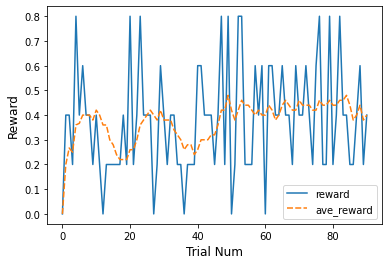

In [78]:
plt = sns.lineplot(data=data)
plt.set_xlabel('Trial Num', fontsize=12)
plt.set_ylabel('Reward', fontsize=12)